In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Data Generate X,Y
def generateDataset(m):
    X = np.random.randn(m) * 10
    noise = np.random.randn(m)
    y = 3*X + 1 + 4 * noise
    return X,y
#print(X.mean(), X.std())

In [5]:
X,y = generateDataset(100)
print(X.shape, y.shape)

(100,) (100,)


In [6]:
def plotData(X,y,color="orange",title="Data"):
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(X,y,c=color)
    plt.show()

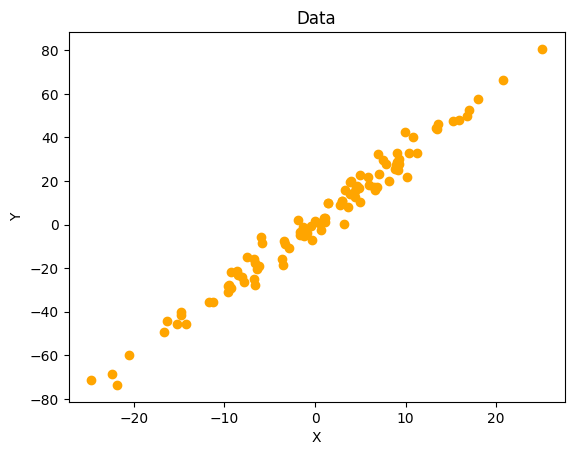

In [7]:
plotData(X,y)

In [8]:
def normaliseData(X):
    X = (X-X.mean()) / X.std()
    return X

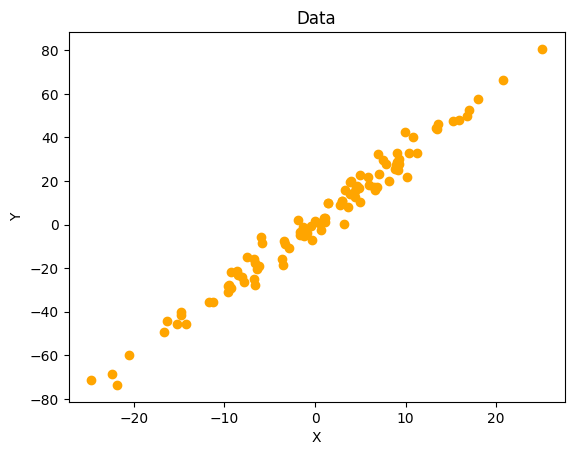

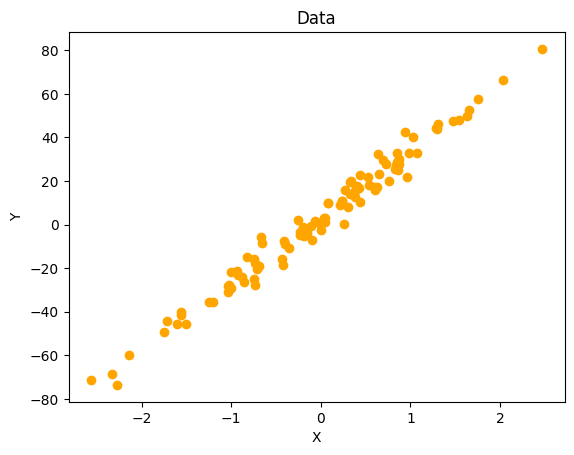

In [9]:
plotData(X,y)
X = normaliseData(X)
plotData(X,y)

In [10]:
X.std()

1.0

In [11]:
def trainTestSplit(X, y, split=0.8):
    m = X.shape[0]
    data = np.zeros((m,2))
    data[:,0] = X
    data[:,1] = y
    np.random.shuffle(data)
    split = int(m*split)
    XT = data[:split,0]
    yT = data[:split,1]
    Xt = data[split:, 0]
    yt = data[split:,1]
    return XT, yT, Xt, yt

In [12]:
XT,yT,Xt,yt = trainTestSplit(X,y)

In [13]:
print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(80,) (80,)
(20,) (20,)


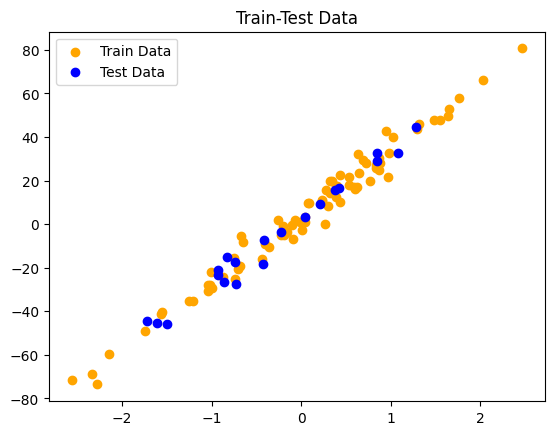

In [14]:
plt.scatter(XT,yT,color='orange',label='Train Data')
plt.scatter(Xt,yt,color='blue', label='Test Data')
plt.title("Train-Test Data")
plt.legend()
plt.show()

In [15]:
# Hypothesis
def hypothesis(X,theta):
    return theta[0] + theta[1] * X

def error(X,y,theta):
    m = X.shape[0]
    e = 0
    for i in range(m):
        y_i = hypothesis(X[i], theta)
        e = e + (y[i] - y_i)**2
    return e/(2*m)

def gradient(X,y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        exp = hypothesis(X[i],theta) - y[i]
        grad[0] += (exp)
        grad[1] += (exp)*X[i]
    return grad/m

#def train(X,y,learning_rate = 0.1, maxItrs = 100):
#    theta = np.zeros((2,))
#    error_list = []
##    for i in range(maxItrs):
 #       grad = gradient(X,y,theta)
 #       error_list.append(error(X,y,theta))
 #       theta[0] = theta[0] - learning_rate * grad[0]
 #       theta[1] = theta[1] - learning_rate * grad[1]
 #   plt.xlabel("Iteration Number")
 #   plt.ylabel("Loss")
 #   plt.plot(error_list)
 #   return theta

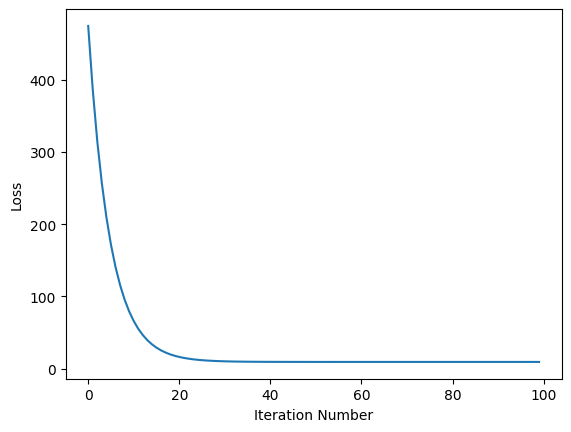

In [16]:
theta = train(X,y,0.1,100)

In [17]:
theta

array([ 3.22484217, 30.31562438])

In [18]:
def predict(X,theta):
    return hypothesis(X,theta)

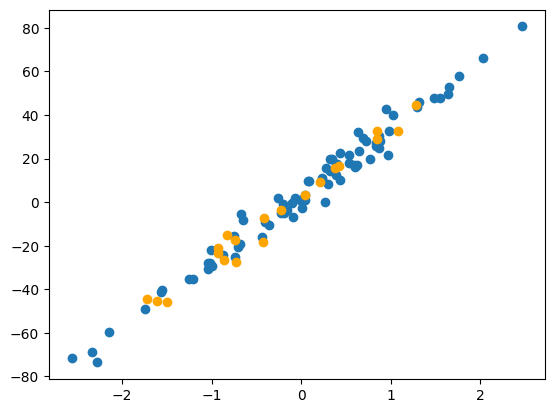

In [19]:
plt.scatter(XT,yT)
plt.scatter(Xt,yt,color='orange')
plt.show()

In [20]:
yp = predict(Xt,theta)

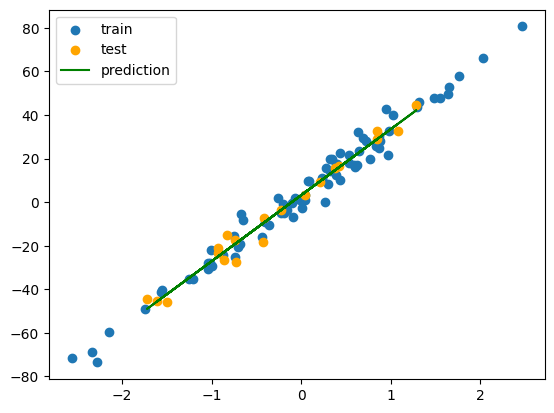

In [21]:
plt.scatter(XT,yT,label='train')
plt.scatter(Xt,yt,color='orange', label='test')
plt.plot(Xt,yp,color='green',label='prediction')
plt.legend()
plt.show()

In [24]:
# Model Evaluation
def r2Score(y,yp):
    ymean = y.mean()
    num = np.sum((y-yp)**2)
    denom = np.sum((y-ymean)**2)
    return 1 - num/denom

r2Score(yt,yp)

0.9790548604649316

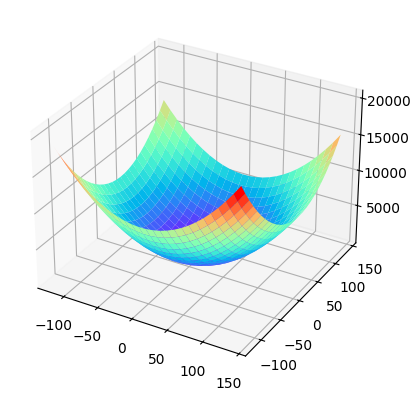

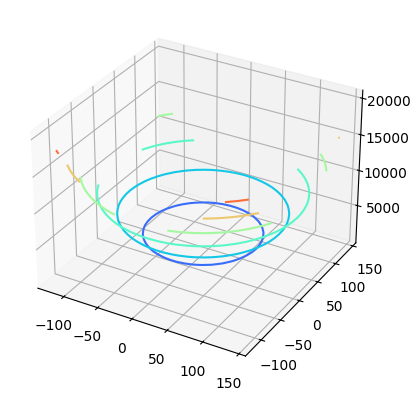

In [27]:
# Visualizing the training process
T0 = np.arange(-120,150,10)
T1 = np.arange(-120,150,10)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        yp = T1[i,j] * X + T0[i,j]
        J[i,j] = np.mean((y-yp) ** 2) /2

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

In [46]:
# Trace the trajectory of gradient
def train(X,y,learning_rate=0.1,maxItrs=100):
    theta = np.array([-150,100]) #np.zeros((2,))
    error_list = []
    # note down values of theta
    theta_list = []

    for i in range(maxItrs):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]
    
    #plt.xlabel("Iteration Number")
    #plt.ylabel("Loss")
    #plt.plot(error_list)
    return theta, theta_list, error_list

In [47]:
theta, theta_list, error_list = train(XT, yT)


In [48]:
theta_list = np.array(theta_list)

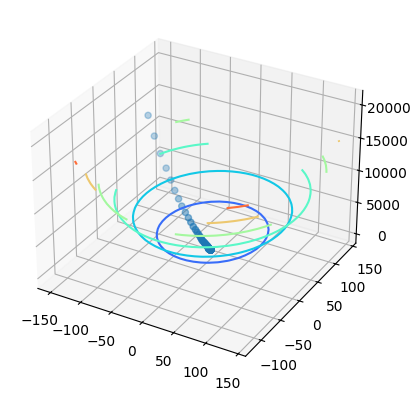

In [49]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

In [37]:
theta_list

[(0.0, 0.0),
 (0.543695284993951, 3.1664227682494),
 (1.010049134165445, 6.000493958847962),
 (1.4092068503762225, 8.537244685342364),
 (1.750045060892548, 10.807999188867122),
 (2.040325477730637, 12.840768502352729),
 (2.286830425994612, 14.660602170142115),
 (2.4954822677092583, 16.28990250559057),
 (2.671448603379234, 17.748705388876985),
 (2.819234916247679, 19.054931178505797),
 (2.942766131804834, 20.224608927274822),
 (3.0454583946936373, 21.272076751867964),
 (3.130282214274367, 22.210160900283082),
 (3.199817996526329, 23.05033578907894),
 (3.2563048617139123, 23.80286703940211),
 (3.3016835425817885, 24.476939323794756),
 (3.337634065221781, 25.080770642085792),
 (3.3656088327991354, 25.621714471730826),
 (3.38686165982125, 26.106351083560178),
 (3.402473240497909, 26.5405691760284),
 (3.4133734780216383, 26.92963885795694),
 (3.4203610514415246, 27.27827689983898),
 (3.424120552461523, 27.590705075617205),
 (3.425237485298368, 27.8707023291896),
 (3.424211388093761, 28.1216

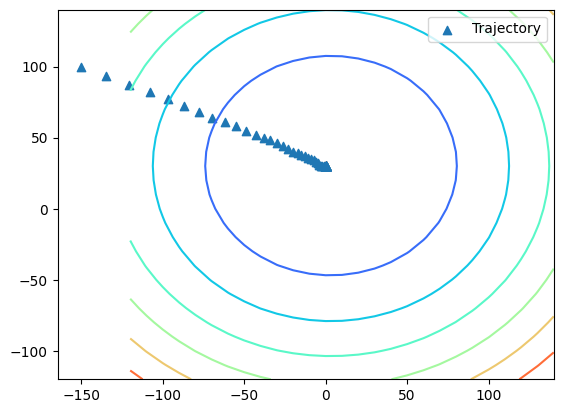

In [50]:
# 2D Contour Plot (Top View)
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],marker='^',label='Trajectory')
plt.legend()
plt.show()